# Problem Set
## "Wholesale Customers" data set

In [1]:
rm(list=ls())
Xorig <- read.table('Wholesale customers data.csv', header=T, sep=",")

head(Xorig)
summary(Xorig)

Channel Region Fresh Milk Grocery Frozen Detergents_Paper Delicassen
1       2      3 12669 9656    7561    214             2674       1338
2       2      3  7057 9810    9568   1762             3293       1776
3       2      3  6353 8808    7684   2405             3516       7844
4       1      3 13265 1196    4221   6404              507       1788
5       2      3 22615 5410    7198   3915             1777       5185
6       2      3  9413 8259    5126    666             1795       1451

    Channel          Region          Fresh             Milk      
 Min.   :1.000   Min.   :1.000   Min.   :     3   Min.   :   55  
 1st Qu.:1.000   1st Qu.:2.000   1st Qu.:  3128   1st Qu.: 1533  
 Median :1.000   Median :3.000   Median :  8504   Median : 3627  
 Mean   :1.323   Mean   :2.543   Mean   : 12000   Mean   : 5796  
 3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.: 16934   3rd Qu.: 7190  
 Max.   :2.000   Max.   :3.000   Max.   :112151   Max.   :73498  
    Grocery          Frozen        Detergents_Paper    Delicassen     
 Min.   :    3   Min.   :   25.0   Min.   :    3.0   Min.   :    3.0  
 1st Qu.: 2153   1st Qu.:  742.2   1st Qu.:  256.8   1st Qu.:  408.2  
 Median : 4756   Median : 1526.0   Median :  816.5   Median :  965.5  
 Mean   : 7951   Mean   : 3071.9   Mean   : 2881.5   Mean   : 1524.9  
 3rd Qu.:10656   3rd Qu.: 3554.2   3rd Qu.: 3922.0   3rd Qu.: 1820.2  
 Max.   :92780   Max.   :60869.0   Max.   :40827.0   Max.   :47943.0  

### From Codebook:
1 FRESH: annual spending (m.u.) on fresh products (Continuous) <br>
2 MILK: annual spending (m.u.) on milk products (Continuous) <br>
3 GROCERY: annual spending (m.u.)on grocery products (Continuous) <br>
4 FROZEN: annual spending (m.u.)on frozen products (Continuous) <br>
5 DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) <br>
6 DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous) <br>
7 CHANNEL: customers’ Channel - Horeca (Hotel/Restaurant/Café) or Retail channel **(Nominal)** <br>
8 REGION: customers’ Region – Lisnon, Oporto or Other **(Nominal)**

**-> Convert nomimals to factors!**

In [2]:
x <- Xorig

N <- dim(Xorig)[1]
p <- dim(Xorig)[2]

x[,1] <- as.factor(x[,1])
levels(x[,1]) <- c('HoReCa','retail')
x[,2] <- as.factor(x[,2])
levels(x[,2]) <- c('Lisbon','Oporto','other')

## shuffle data, it is sorted
i <- sample(1:N, N)
x <- x[i,]

summary(x)

   Channel       Region        Fresh             Milk          Grocery     
 HoReCa:298   Lisbon: 77   Min.   :     3   Min.   :   55   Min.   :    3  
 retail:142   Oporto: 47   1st Qu.:  3128   1st Qu.: 1533   1st Qu.: 2153  
              other :316   Median :  8504   Median : 3627   Median : 4756  
                           Mean   : 12000   Mean   : 5796   Mean   : 7951  
                           3rd Qu.: 16934   3rd Qu.: 7190   3rd Qu.:10656  
                           Max.   :112151   Max.   :73498   Max.   :92780  
     Frozen        Detergents_Paper    Delicassen     
 Min.   :   25.0   Min.   :    3.0   Min.   :    3.0  
 1st Qu.:  742.2   1st Qu.:  256.8   1st Qu.:  408.2  
 Median : 1526.0   Median :  816.5   Median :  965.5  
 Mean   : 3071.9   Mean   : 2881.5   Mean   : 1524.9  
 3rd Qu.: 3554.2   3rd Qu.: 3922.0   3rd Qu.: 1820.2  
 Max.   :60869.0   Max.   :40827.0   Max.   :47943.0  

### Check distributions

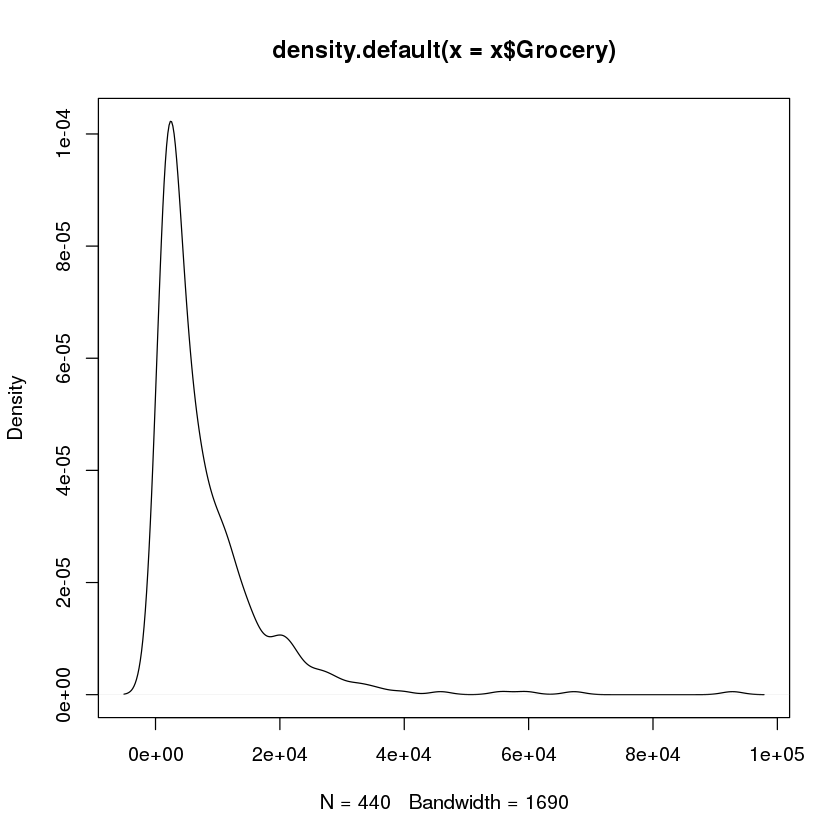

In [3]:
plot(density(x$Grocery))

Skewed distributions and Outliers are a problem.
We can transform the data with log or sqrt.

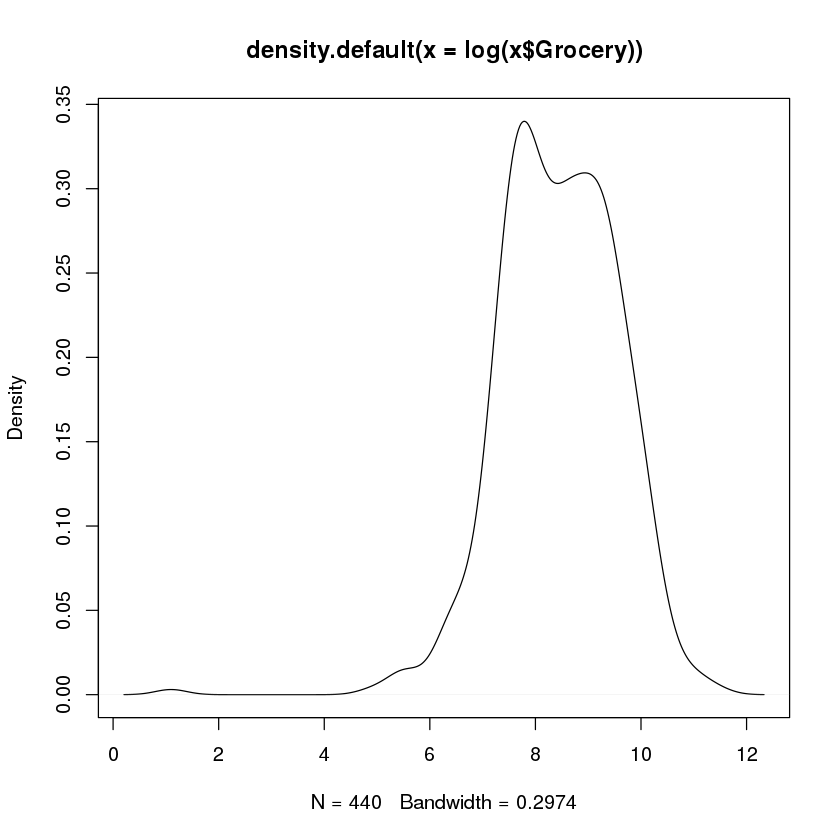

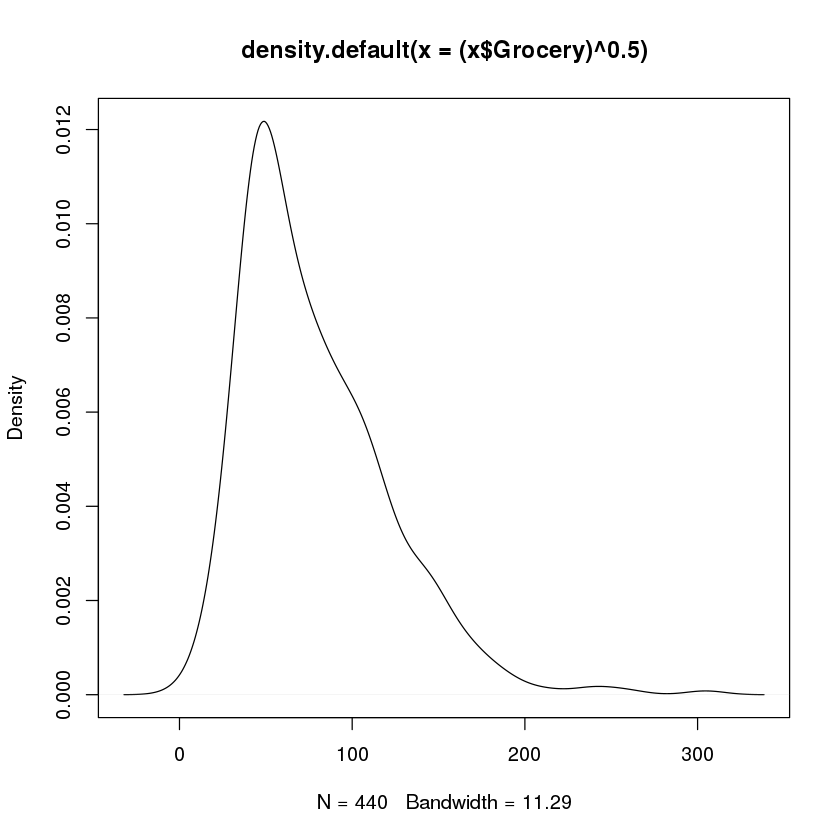

In [4]:
plot(density(log(x$Grocery)))
plot(density((x$Grocery)^0.5))

Investigate Boxplots

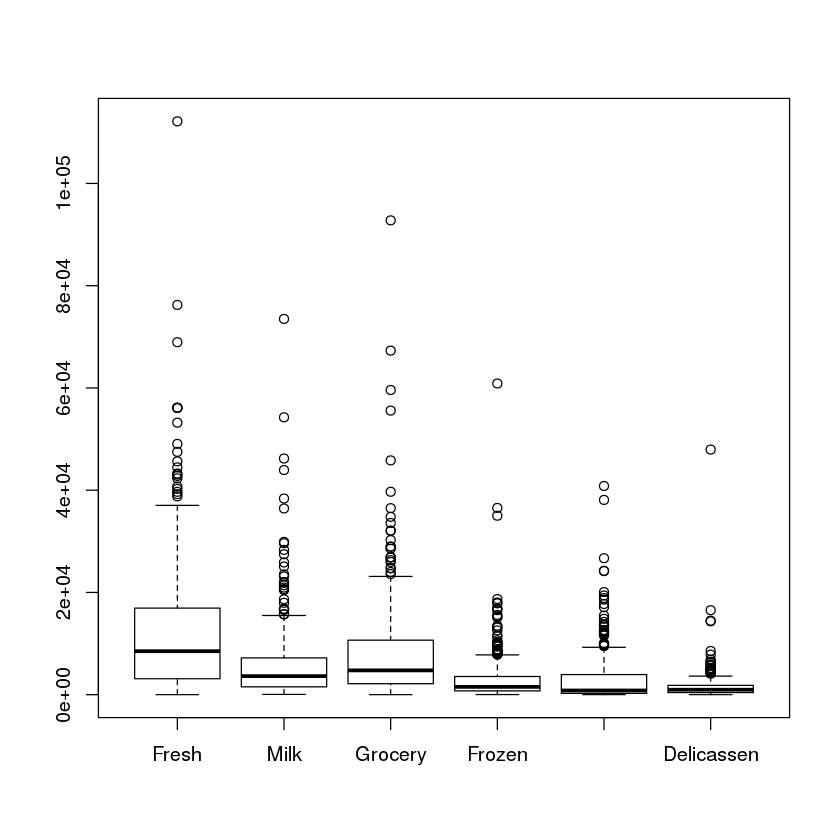

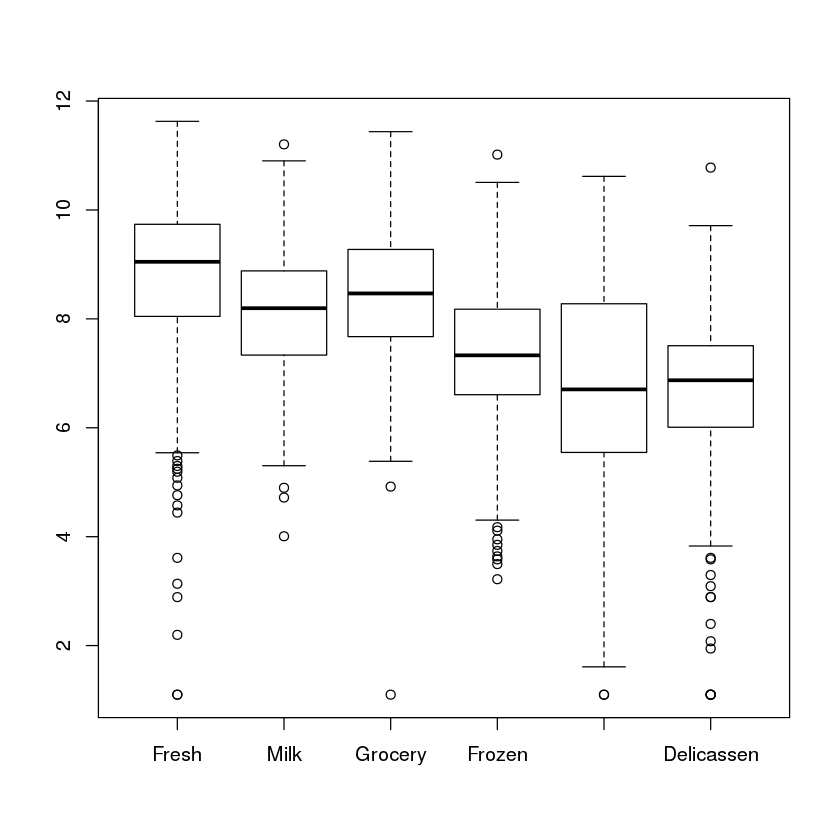

In [5]:
boxplot(x[,3:p])
boxplot(log(x[,3:p]))

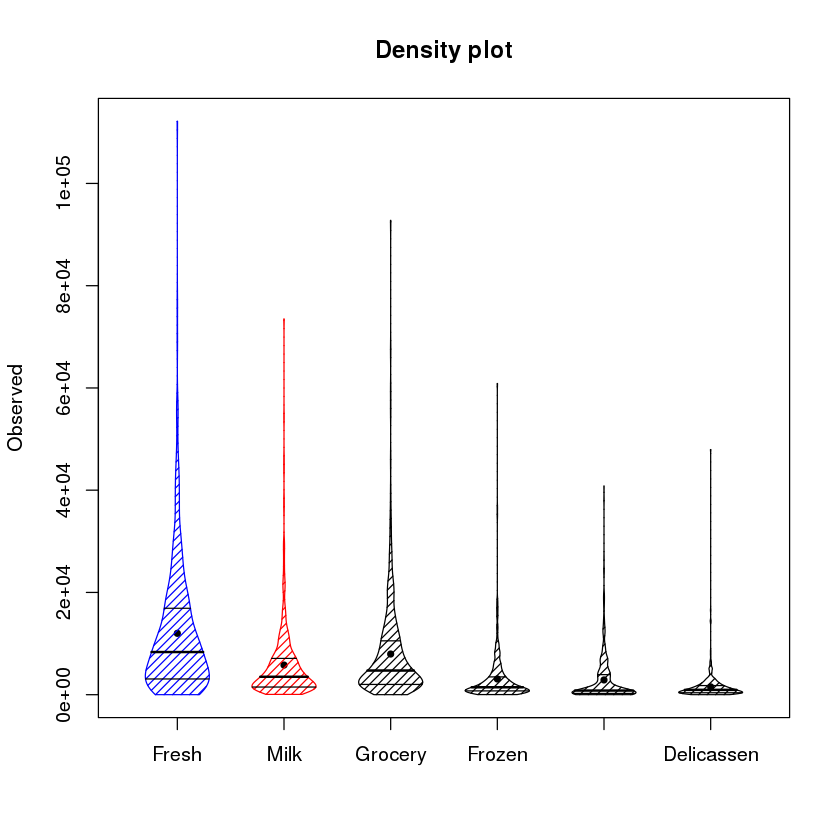

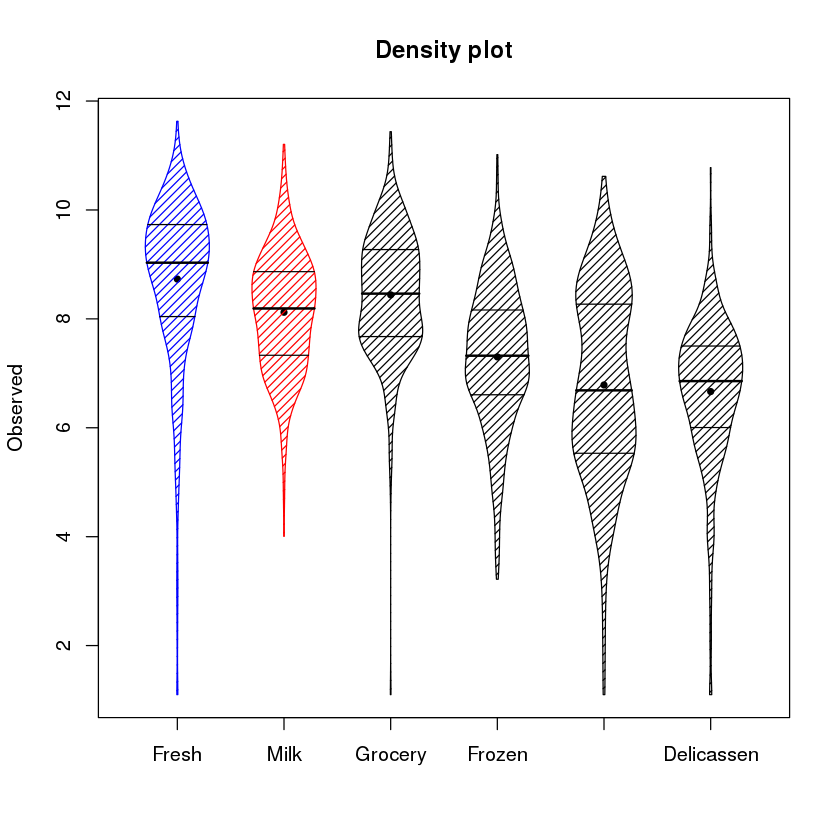

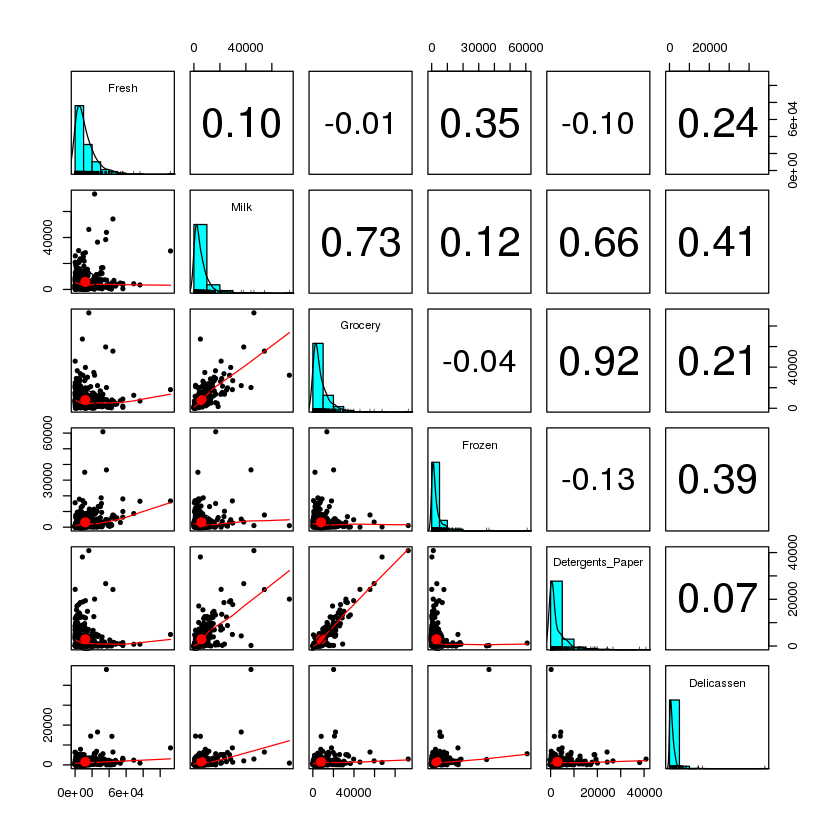

In [6]:
## more visualization
library(psych)
densityBy(x[,3:p])
densityBy(log(x[,3:p]))
pairs.panels(x[,-(1:2)])

### Transform data to get rid of skewness (sort of...)

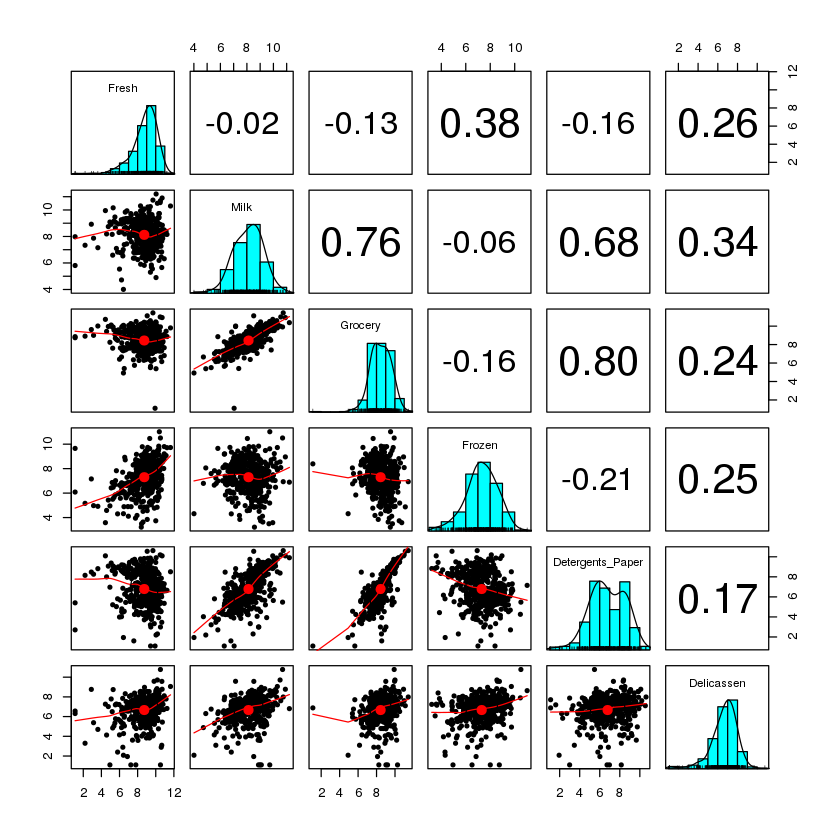

In [7]:
x[,3:p] <- log(x[,3:p])
pairs.panels(x[,-(1:2)])

There is high correlation. See if we can reduce the dimensions of the data.

Method of choice: **Principal Component Analysis**

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6
Standard deviation     2.1995 1.7391 1.1272 1.02557 0.70739 0.50095
Proportion of Variance 0.4424 0.2766 0.1162 0.09618 0.04576 0.02295
Cumulative Proportion  0.4424 0.7189 0.8351 0.93130 0.97705 1.00000

Fresh             Milk          Grocery           Frozen 
        2.190611         1.169351         1.245839         1.650043 
Detergents_Paper       Delicassen 
        2.961910         1.718279

PC1        PC2         PC3         PC4           PC5
Fresh             0.1737170 0.68513571  0.67351166  0.21432619 -0.0008216197
Milk             -0.3944630 0.16239926 -0.03306794 -0.01855770  0.7222883429
Grocery          -0.4543636 0.06937908  0.03218274 -0.06448674  0.3479932542
Frozen            0.1721960 0.48769100 -0.28481122 -0.80608348 -0.0362433682
Detergents_Paper -0.7455150 0.04191162  0.21824404 -0.19005006 -0.5636647597
Delicassen       -0.1494356 0.50970874 -0.64459672  0.51348977 -0.1953663907
                         PC6
Fresh             0.02927638
Milk             -0.54303508
Grocery           0.81390826
Frozen            0.01744770
Detergents_Paper -0.20244363
Delicassen        0.02283197

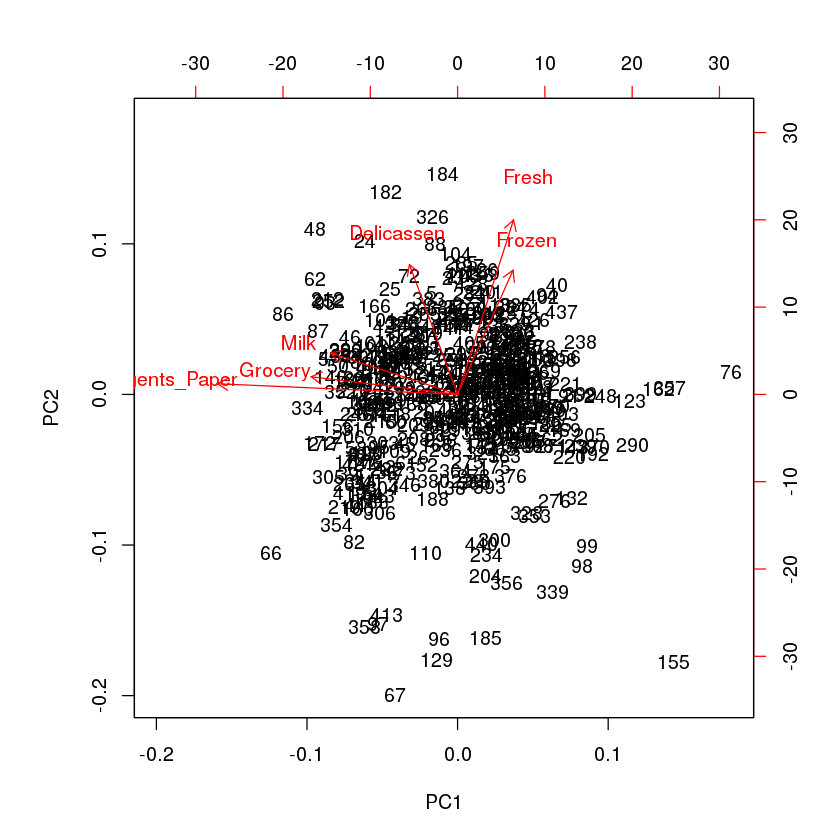

In [20]:
pc_fit <- prcomp(x[,3:p])
summary(pc_fit)

diag(var(x[,3:p])) # see if variances in the same ballpark: yes. If not, we need to scale data. 
#(scaling by default is good unless the magnitude of the values contain important information)

biplot(pc_fit)
pc_fit$rotation

## Clustering
There are no obvious clusters. So hierarchical methods are not the best way to go. We use partitioning methods.

Additional Questions:

* Do people from lisbon shop differently from those elsewhere?
* if new customers are observed, can we predict where they come from? Whether they are HoReCa or retail?


**Do the clustering and answer these questions until next week!**
